# Employee Atrrition Problem

Many employers struggle with thre perenial problem of keeping their employees happy and satisfied. It takes more time and energy to look for a replacement when an employee leaves. Thefore, the objective of this project is to determine:
1. What type of employees are leaving?
2. Determine which employees are prone to leave next?


## Exploratory Data Analysis

This stage entails the business discovery process; understanding the various drivers influencing the business problem. Getting to know the business drivers is important as it will help in formulating hypotheses about the business problem, whuch can be verified during the Exploratory data analyis(EDA). The verfications of hypotheses will help in formulating intuitions for feature engineering, which will be critical for the veracity of the models that are built thereafter

The problem statement is to identify the employees who have a propensity to leave. Some of the questions on the factors that might influence the propensity for employees to leave are:
1. Are employees who are less satisfied with their jobs more prone to leave?
2. Is there a relationship between the number of projects an employee is working on and thier propensity to leave?
3. Is the time spent at the company(average monthly hours and Total time spent) affect the likelihood of an employee leaving?
4. Whether employees with higher number of accidents are likely to leave?
5. Whether the lack of a promotion in the last five years might lead to employees leaving?
6. Does the department type influence the likelihood of an employee leaving?
7. Will the salary play a role in the propensity of an employee leaving?


### Loading and Exploring the Dataset

In [1]:
#loading the necessary libraries
import pandas as pd

In [3]:
#loading the ex_employees sheet from the excel file
ex_employees = pd.read_excel('dataset/Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx',2)
ex_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [52]:
# gettting the shape of the data
print(ex_employees.shape)

(3571, 10)


In [53]:
# getting the information on the dataset
ex_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
Emp ID                   3571 non-null int64
satisfaction_level       3571 non-null float64
last_evaluation          3571 non-null float64
number_project           3571 non-null int64
average_montly_hours     3571 non-null int64
time_spend_company       3571 non-null int64
Work_accident            3571 non-null int64
promotion_last_5years    3571 non-null int64
dept                     3571 non-null object
salary                   3571 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB


In [69]:
# Inserting the target variable column in the dataset
# '1' for ex_employees left and '0' for existing employees
ex_employees['target'] = 'left'
ex_employees.head()



,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,target
0,1,0.38,0.53,2,157,3,0,0,sales,low,left
1,2,0.80,0.86,5,262,6,0,0,sales,medium,left
2,3,0.11,0.88,7,272,4,0,0,sales,medium,left
3,4,0.72,0.87,5,223,5,0,0,sales,low,left
4,5,0.37,0.52,2,159,3,0,0,sales,low,left


In [4]:
# loading the current employees sheet
current_employees = pd.read_excel('dataset/Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx',1)
current_employees.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
11423,14207,0.90,0.55,3,259,10,1,1,management,high
11424,14208,0.74,0.95,5,266,10,0,1,management,high
11425,14209,0.85,0.54,3,185,10,0,1,management,high
11426,14210,0.33,0.65,3,172,10,0,1,marketing,high
11427,14211,0.50,0.73,4,180,3,0,0,IT,low


In [71]:
current_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [72]:
# checking info
current_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 10 columns):
Emp ID                   11428 non-null int64
satisfaction_level       11428 non-null float64
last_evaluation          11428 non-null float64
number_project           11428 non-null int64
average_montly_hours     11428 non-null int64
time_spend_company       11428 non-null int64
Work_accident            11428 non-null int64
promotion_last_5years    11428 non-null int64
dept                     11428 non-null object
salary                   11428 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 892.9+ KB


In [73]:
#Inserting the target variable
# '0' for current employees
current_employees['target'] = 'stayed'

In [74]:
current_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,target
0,2001,0.58,0.74,4,215,3,0,0,sales,low,stayed
1,2002,0.82,0.67,2,202,3,0,0,sales,low,stayed
2,2003,0.45,0.69,5,193,3,0,0,sales,low,stayed
3,2004,0.78,0.82,5,247,3,0,0,sales,low,stayed
4,2005,0.49,0.60,3,214,2,0,0,sales,low,stayed


In [75]:
# Concatentating the two dataframes- Current and ex_employees
employees = pd.concat([ex_employees,current_employees],ignore_index=True)
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
Emp ID                   14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
target                   14999 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [76]:
# sorting the dataset by the Emp ID column
employees = employees.sort_values(by='Emp ID',ascending=True)
employees.tail(10)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,target
3561,14990,0.43,0.57,2,159,3,1,0,technical,low,left
3562,14991,0.89,0.88,5,228,5,1,0,support,low,left
3563,14992,0.09,0.81,6,257,4,0,0,support,low,left
3564,14993,0.40,0.48,2,155,3,0,0,support,low,left
3565,14994,0.76,0.83,6,293,6,0,0,support,low,left
3566,14995,0.40,0.57,2,151,3,0,0,support,low,left
3567,14996,0.37,0.48,2,160,3,0,0,support,low,left
3568,14997,0.37,0.53,2,143,3,0,0,support,low,left
3569,14998,0.11,0.96,6,280,4,0,0,support,low,left
3570,14999,0.37,0.52,2,158,3,0,0,support,low,left


In [77]:
#checking for null values
employees.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
target                   0
dtype: int64

In [78]:
# checking for duplicates
employees.duplicated().sum()

0

**There are no null values or duplicates in the dataset**

### Testing Business Hypotheses using EDA

In [169]:
# Vissualizing the dataset for EDA
# importing the necessary dependencies
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


**Employee Satisfaction Level**

Text(0.5, 1.0, 'Sattisfaction Level Distribution')

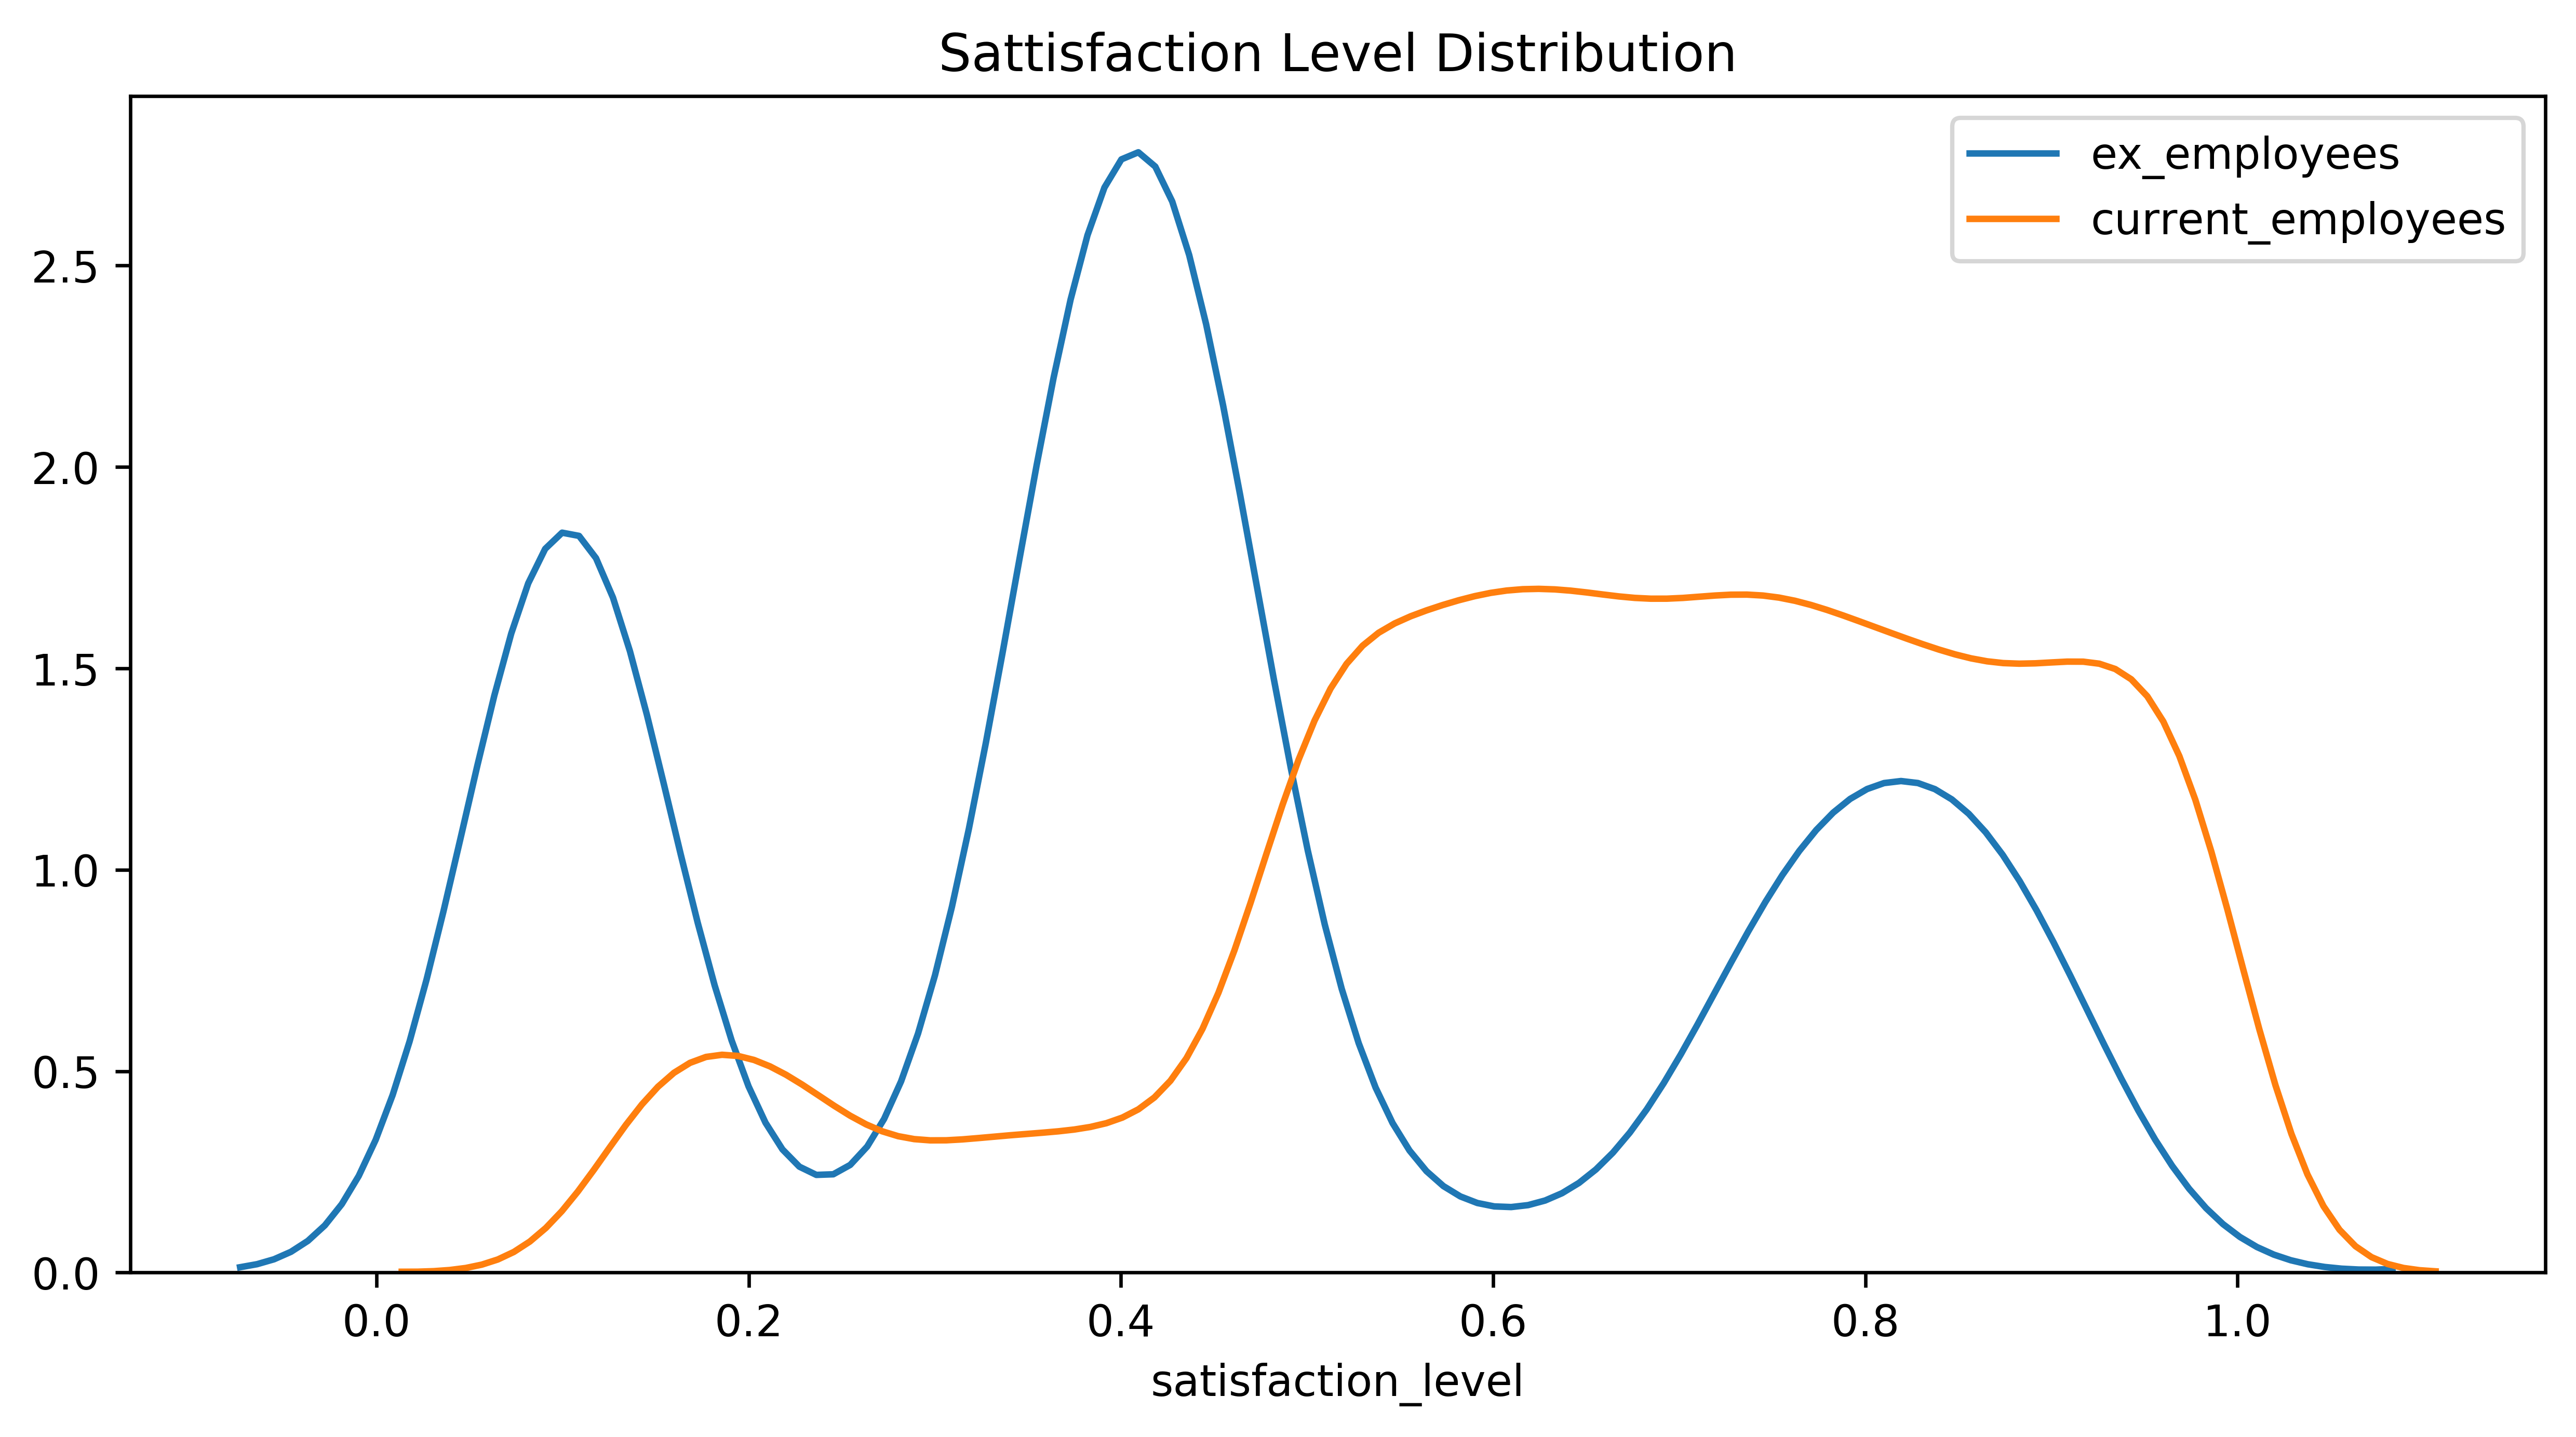

In [148]:
#plotting a distribution plot
fig,ax = plt.subplots(figsize=(10,5),dpi=600)
sns.distplot(ex_employees['satisfaction_level'],ax=ax,label='ex_employees',hist=False)
sns.distplot(current_employees['satisfaction_level'],label='current_employees',ax=ax,hist=False)
ax.set_title("Sattisfaction Level Distribution")


Insight: Employees with a satisfaction level of about 0.4 had a higher propensity to leave.

**Last Evaluation**

Text(0.5, 1.0, 'Last Evaluation Distribution')

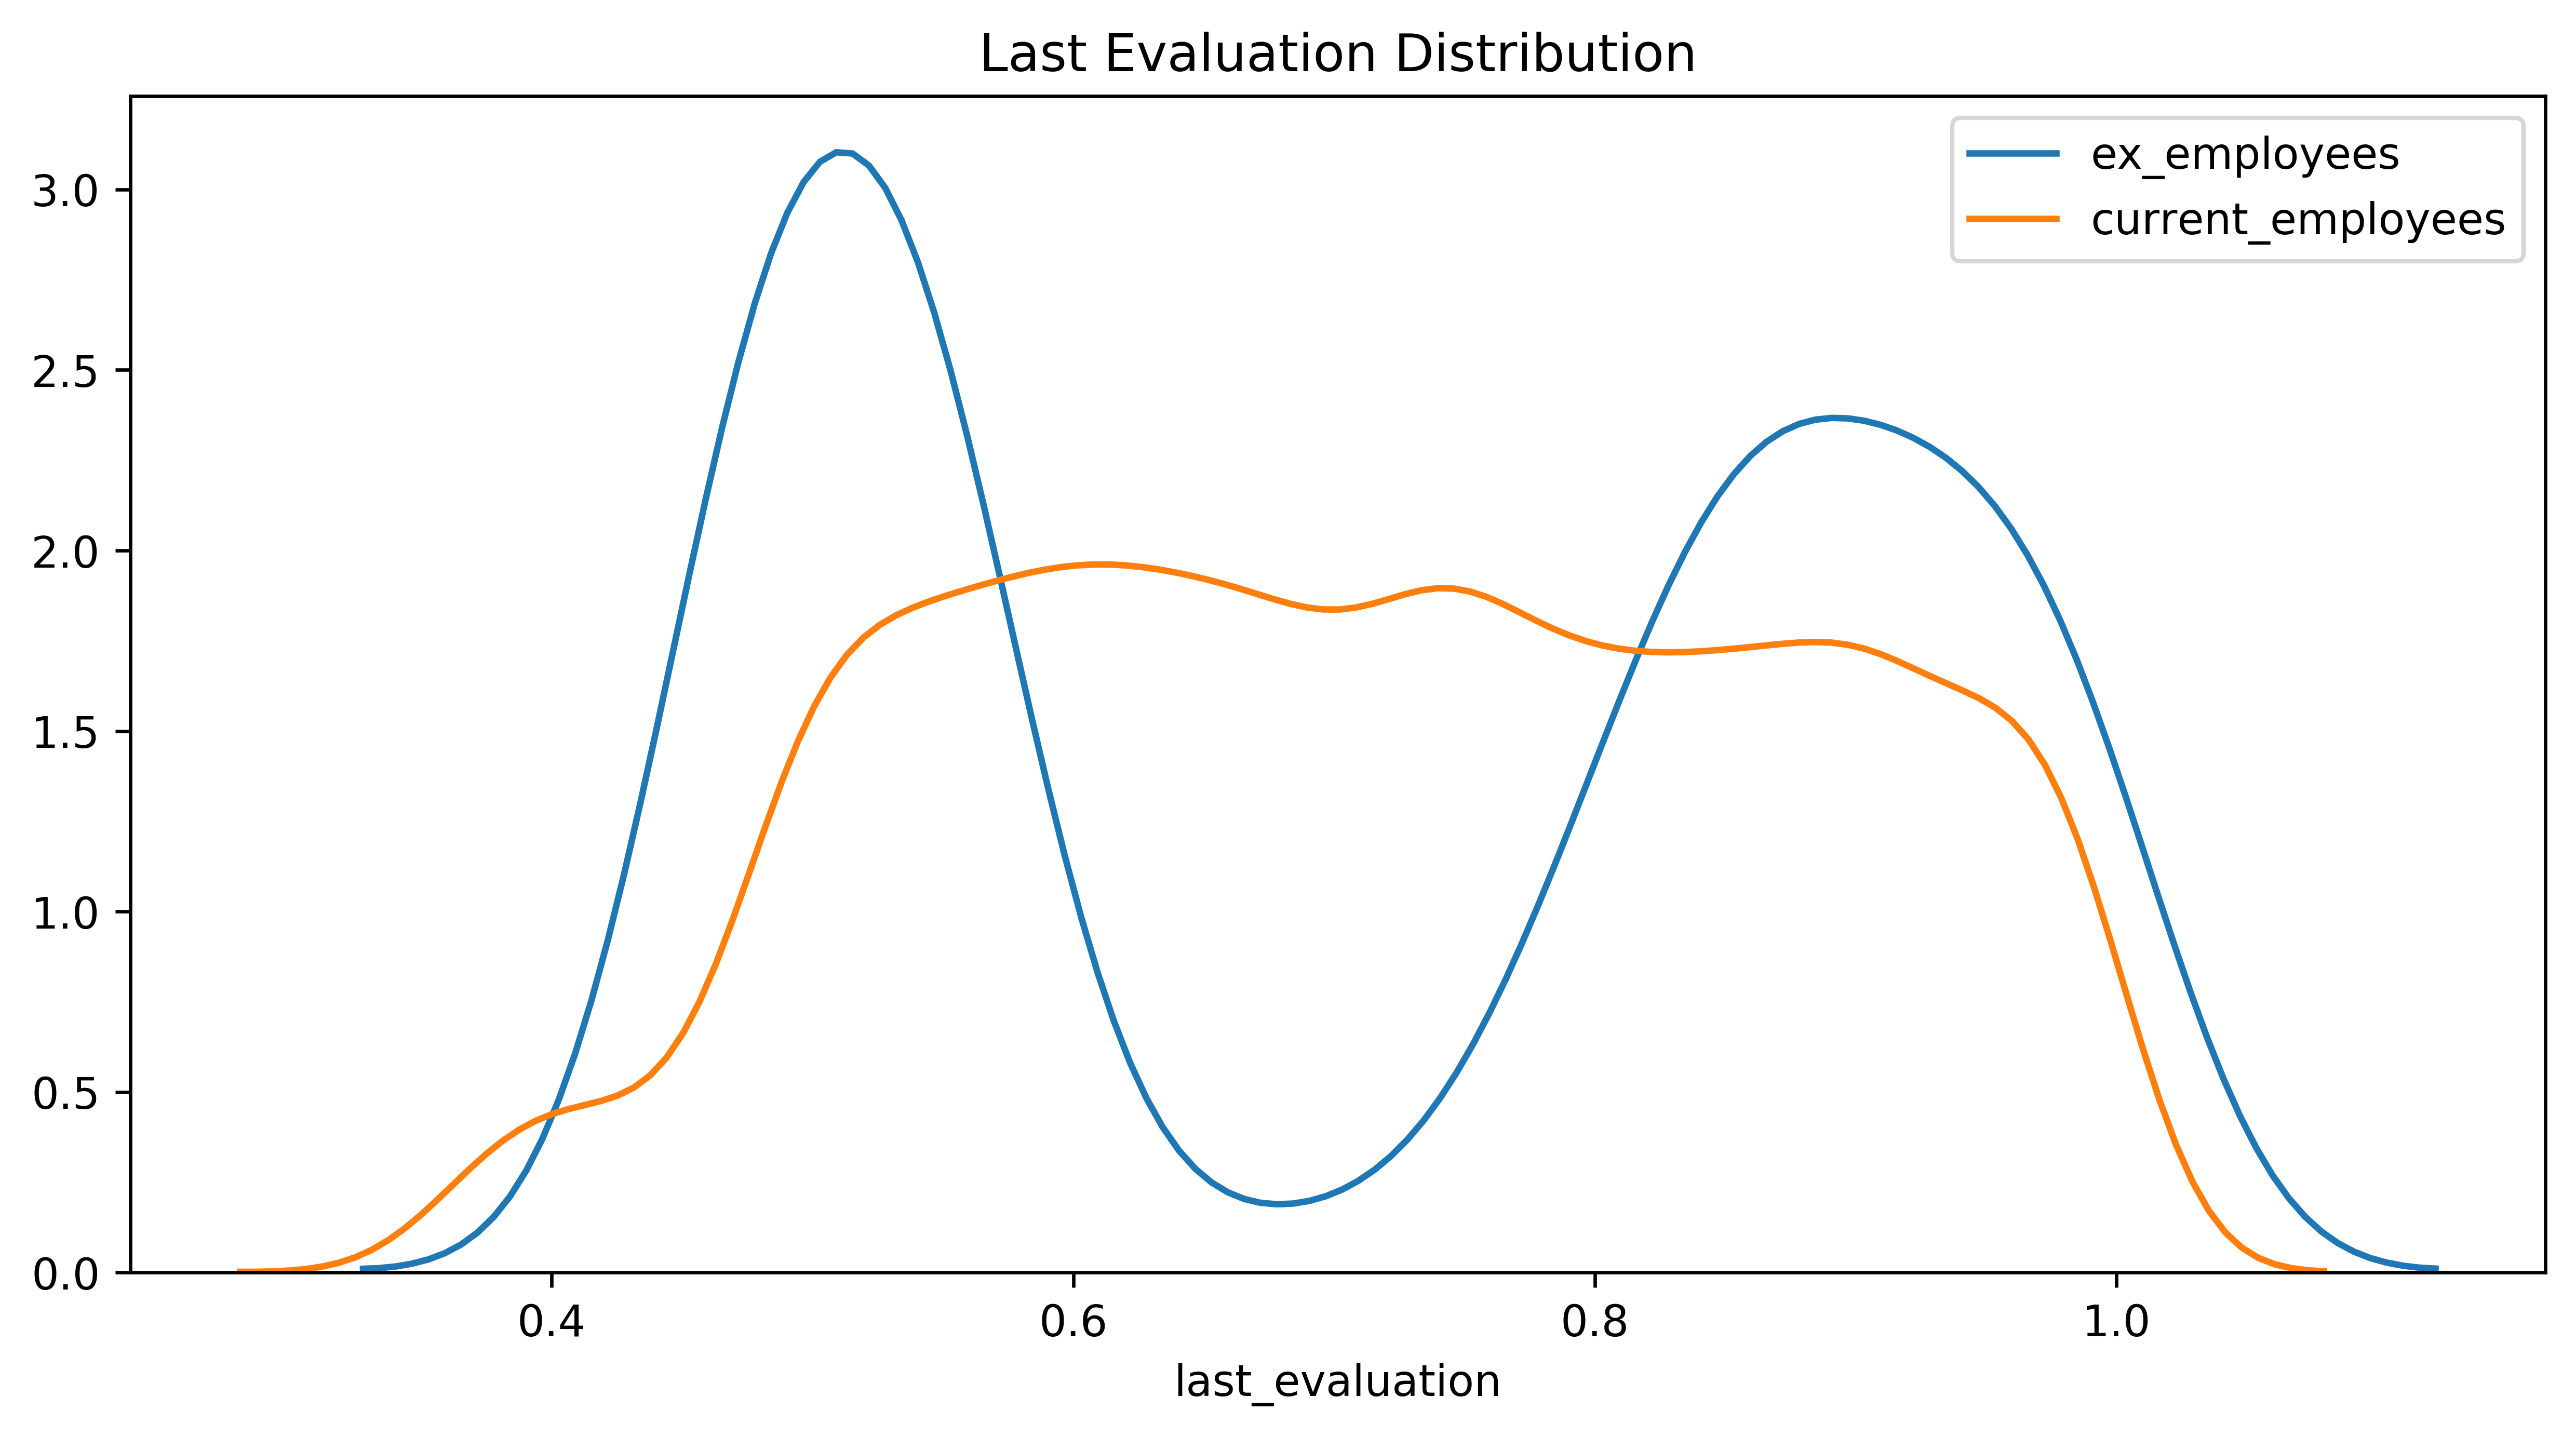

In [149]:
#plotting a distribution plot
fig,ax = plt.subplots(figsize=(10,5),dpi=600)
sns.distplot(ex_employees['last_evaluation'],ax=ax,label='ex_employees',hist=False)
sns.distplot(current_employees['last_evaluation'],label='current_employees',ax=ax,hist=False)
ax.set_title("Last Evaluation Distribution")

Insight: Employees who recieved a valuation between 0.6 to 0.75 were the least likely to leave

**Average Monthly Hours**

Text(0.5, 1.0, 'Average Monthly Hours Distribution')

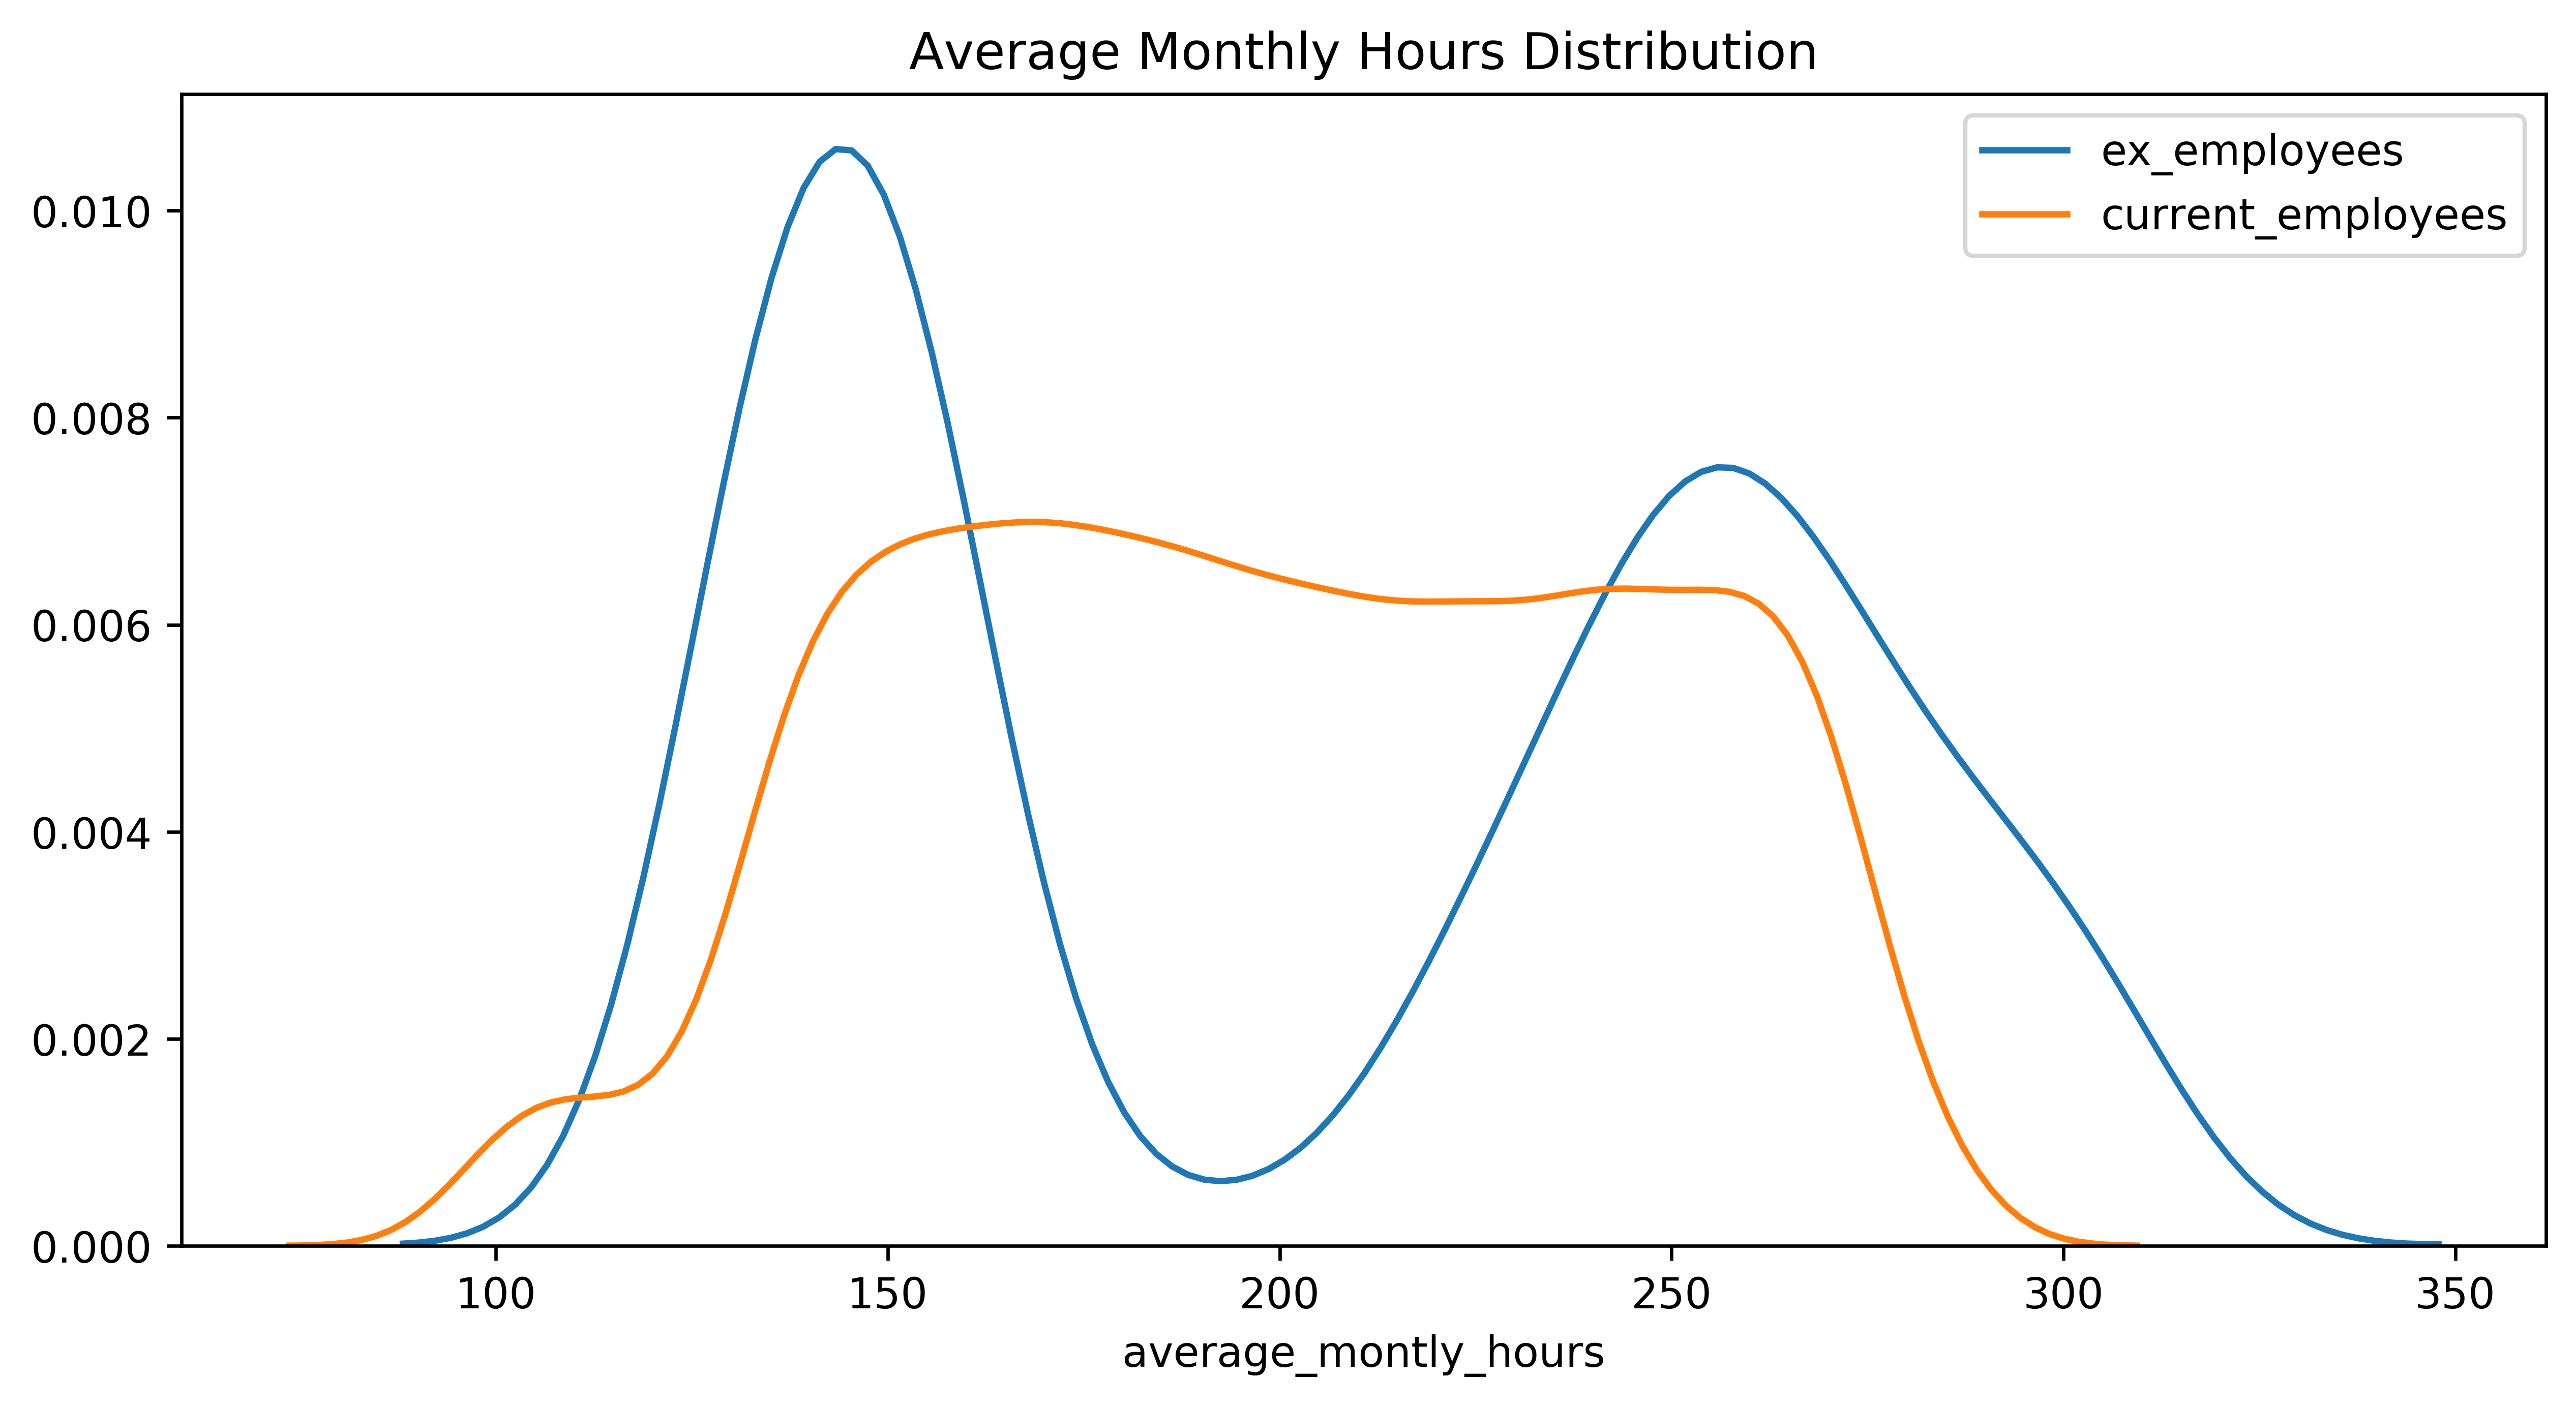

In [150]:
#plotting distribution plot
fig,ax = plt.subplots(figsize=(10,5),dpi=600)
sns.distplot(ex_employees['average_montly_hours'],ax=ax,label='ex_employees',hist=False)
sns.distplot(current_employees['average_montly_hours'],label='current_employees',ax=ax,hist=False)
ax.set_title("Average Monthly Hours Distribution")

Insight: Employees who worked an average 160 to 220 hours per month were less likely to leave. Employees working more than 300hours per month are more likely to leave.

**Number of Projects**

In [101]:
#grouping per category
no_project_cat = employees.groupby(['number_project','target'])['target'].agg(proj_cat = 'count').reset_index()

# grouping total number of projects
no_project_total = employees.groupby('number_project')['target'].agg(proj_total='count').reset_index()

#combining the two dataframes
proj_combined = pd.merge(no_project_cat,no_project_total)
proj_combined['proj_prop']=(proj_combined['proj_cat']/proj_combined['proj_total'])*100
proj_combined.head()



,number_project,target,proj_cat,proj_total,proj_prop
0,2,left,1567,2388,65.619765
1,2,stayed,821,2388,34.380235
2,3,left,72,4055,1.775586
3,3,stayed,3983,4055,98.224414
4,4,left,409,4365,9.369989


Text(0.5, 1.0, 'Propotion of employees vs number of projects ')

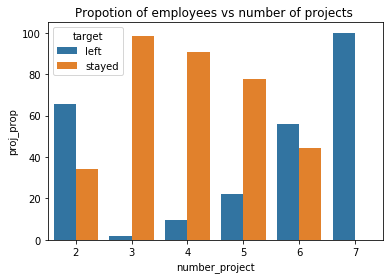

In [102]:
#plotting the barchart
sns.barplot(x='number_project',y='proj_prop',hue='target',data=proj_combined)
plt.title("Propotion of employees vs number of projects ")

In [142]:
#number of employees working on seven projects who left
(employees[employees['target']=='left']['number_project']==7).sum()


256

Insight: The highest propotion of employees who left were the ones working on the fewest projects(2 projects). The least number of employees who left were the ones working on the 3 projects. There were more employees who left than those who stayed for the ones working on six projects. All employees working on seven projects left. The ideal number of projects are 3, 4 and 5.

**Time Spent at the Company**

In [105]:
#grouping per category
time_spent_cat = employees.groupby(['time_spend_company','target'])['target'].agg(time_cat = 'count').reset_index()

# grouping total number of projects
time_spent_total = employees.groupby('time_spend_company')['target'].agg(time_total='count').reset_index()

#combining the two dataframes
time_combined = pd.merge(time_spent_cat,time_spent_total)
time_combined['time_prop']=(time_combined['time_cat']/time_combined['time_total'])*100
time_combined.head()

,time_spend_company,target,time_cat,time_total,time_prop
0,2,left,53,3244,1.633785
1,2,stayed,3191,3244,98.366215
2,3,left,1586,6443,24.615862
3,3,stayed,4857,6443,75.384138
4,4,left,890,2557,34.806414


Text(0.5, 1.0, 'Propotion of employees vs Time spent at the company ')

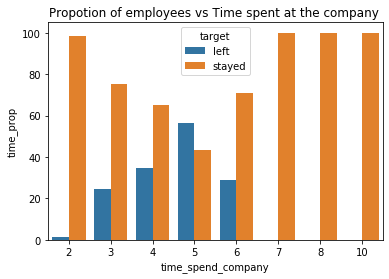

In [106]:
#plotting the barchart
sns.barplot(x='time_spend_company',y='time_prop',hue='target',data=time_combined)
plt.title("Propotion of employees vs Time spent at the company ")

Insight: A higher propotion of employees who have worked at the company for five years tend to leave. Employees who have worked for a longer period, more than six years tend to stay.

**Work Accidents**

In [108]:
#grouping per category
accidents_cat = employees.groupby(['Work_accident','target'])['target'].agg(accidents_cat = 'count').reset_index()

# grouping total number of projects
accidents_total = employees.groupby('Work_accident')['target'].agg(accidents_total='count').reset_index()

#combining the two dataframes
accidents_combined = pd.merge(accidents_cat,accidents_total)
accidents_combined['accidents_prop']=(accidents_combined['accidents_cat']/accidents_combined['accidents_total'])*100
accidents_combined.head()

,Work_accident,target,accidents_cat,accidents_total,accidents_prop
0,0,left,3402,12830,26.515978
1,0,stayed,9428,12830,73.484022
2,1,left,169,2169,7.791609
3,1,stayed,2000,2169,92.208391


Text(0.5, 1.0, 'Propotion of employees vs Work Accidents Occurenece at the company ')

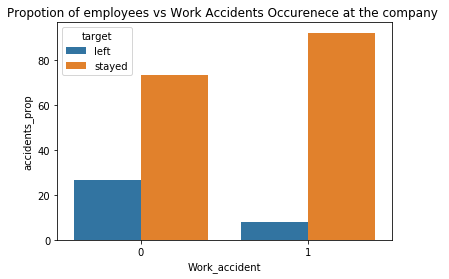

In [118]:
#plotting the barchart
sns.barplot(x='Work_accident',y='accidents_prop',hue='target',data=accidents_combined)
plt.title("Propotion of employees vs Work Accidents Occurenece at the company ")

There isn't mich corelation between the accidents occurence and propensity of employees to leave. The higher propotion of employees who left among those who didn't get an accident can be explained by the higher number of employees in that category.

Insight: Accidents might not have a big effect on propensity of employees leaving.

**Promotions in the last 5 Years**

In [113]:
#grouping per category
promo_cat = employees.groupby(['promotion_last_5years','target'])['target'].agg(promo_cat = 'count').reset_index()

# grouping total number of projects
promo_total = employees.groupby('promotion_last_5years')['target'].agg(promo_total='count').reset_index()

#combining the two dataframes
promo_combined = pd.merge(promo_cat,promo_total)
promo_combined['promo_prop']=(promo_combined['promo_cat']/promo_combined['promo_total'])*100
promo_combined.head()

,promotion_last_5years,target,promo_cat,promo_total,promo_prop
0,0,left,3552,14680,24.196185
1,0,stayed,11128,14680,75.803815
2,1,left,19,319,5.956113
3,1,stayed,300,319,94.043887


Text(0.5, 1.0, 'Propotion of employees vs Promotions offered at the company ')

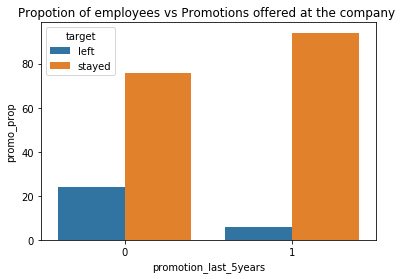

In [117]:
#plotting the barchart
sns.barplot(x='promotion_last_5years',y='promo_prop',hue='target',data=promo_combined)
plt.title("Propotion of employees vs Promotions offered at the company ")

Insight: A higher propotion of employees who left had not recieved any promotions in the last five years left.

**Departments**

In [120]:
#grouping per category
dept_cat = employees.groupby(['dept','target'])['target'].agg(dept_cat = 'count').reset_index()

# grouping total number of projects
dept_total = employees.groupby('dept')['target'].agg(dept_total='count').reset_index()

#combining the two dataframes
dept_combined = pd.merge(dept_cat,dept_total)
dept_combined['dept_prop']=(dept_combined['dept_cat']/dept_combined['dept_total'])*100
dept_combined.head()

,dept,target,dept_cat,dept_total,dept_prop
0,IT,left,273,1227,22.249389
1,IT,stayed,954,1227,77.750611
2,RandD,left,121,787,15.374841
3,RandD,stayed,666,787,84.625159
4,accounting,left,204,767,26.597132


[Text(0, 0, 'IT'),
 Text(0, 0, 'RandD'),
 Text(0, 0, 'accounting'),
 Text(0, 0, 'hr'),
 Text(0, 0, 'management'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'product_mng'),
 Text(0, 0, 'sales'),
 Text(0, 0, 'support'),
 Text(0, 0, 'technical')]

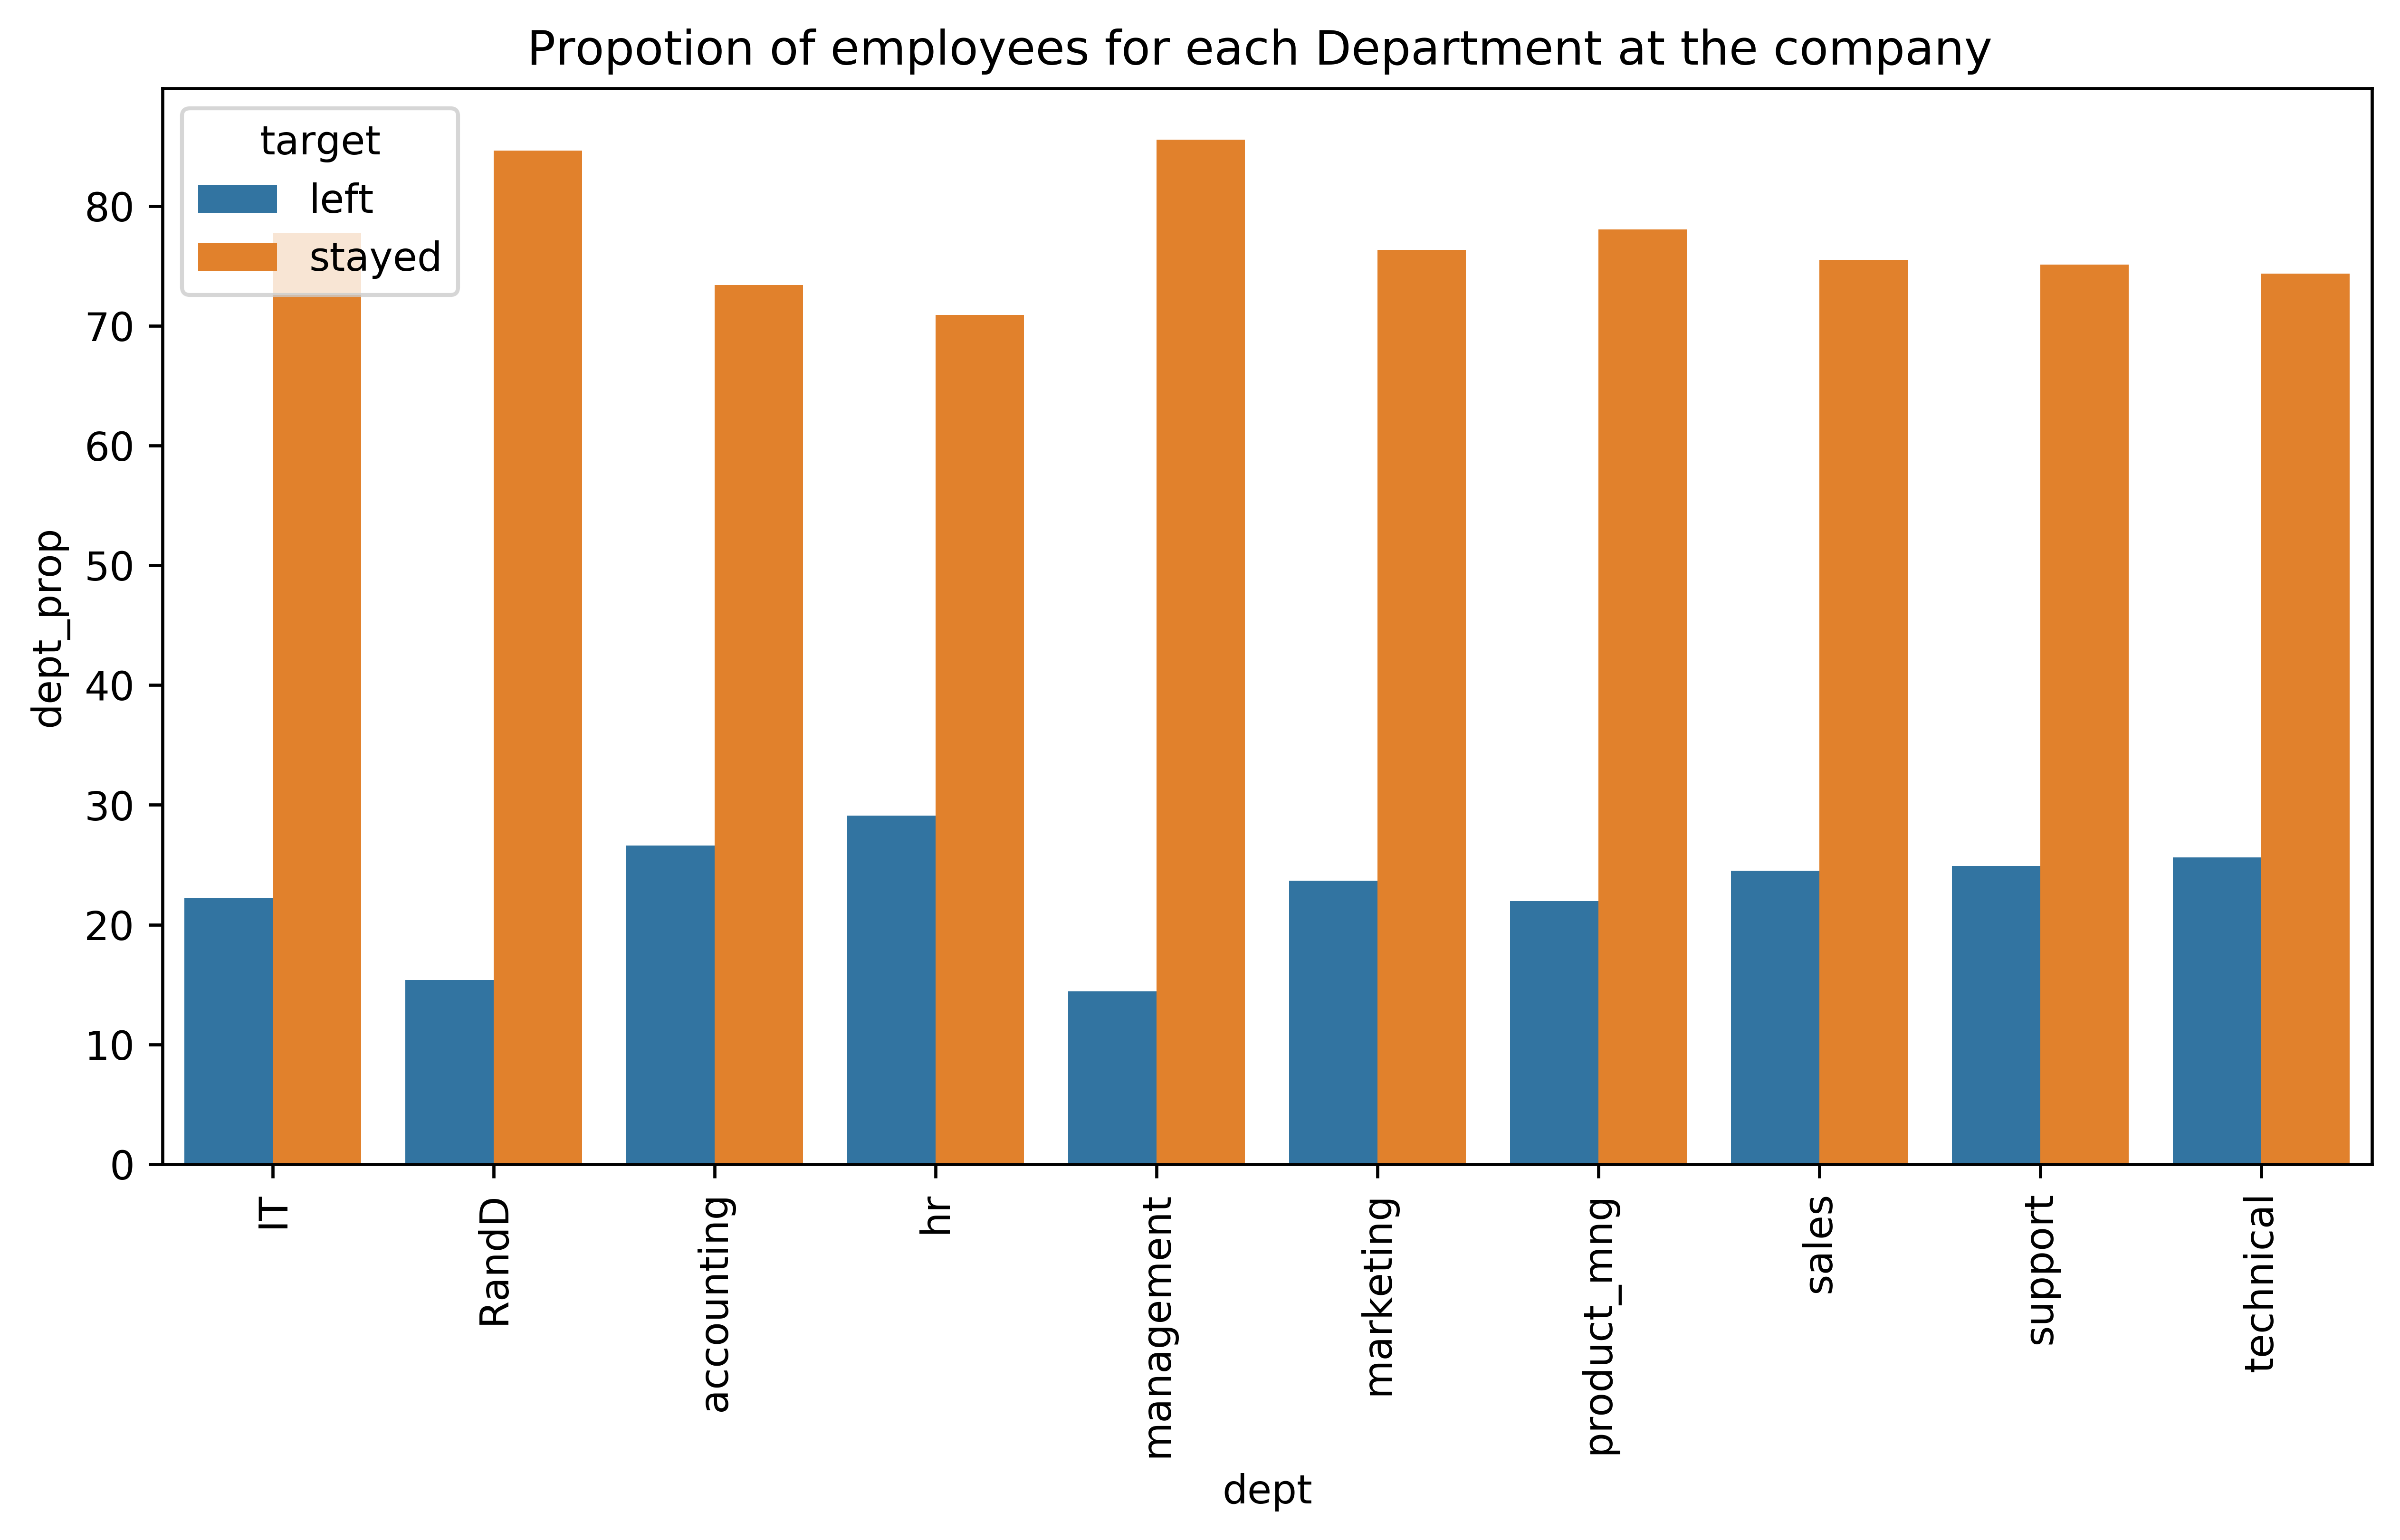

In [125]:
#plotting the barchart
#creating the barplot
job = dept_combined['dept'].unique()
fig,ax = plt.subplots(figsize=(10,5),dpi=600)
sns.barplot(x='dept',y='dept_prop',hue='target',data=dept_combined,ax=ax)
ax.set_title("Propotion of employees for each Department at the company ")
ax.set_xticklabels(job,rotation=90)

Insight:The highest proportion of employees who left are from the HR deparment with the least coming from management.

**Salary**

In [129]:
#grouping per category
sal_cat = employees.groupby(['salary','target'])['target'].agg(sal_cat = 'count').reset_index()

# grouping total number of projects
sal_total = employees.groupby('salary')['target'].agg(sal_total='count').reset_index()

#combining the two dataframes
sal_combined = pd.merge(sal_cat,sal_total)
sal_combined['sal_prop']=(sal_combined['sal_cat']/sal_combined['sal_total'])*100
sal_combined.head()

,salary,target,sal_cat,sal_total,sal_prop
0,high,left,82,1237,6.628941
1,high,stayed,1155,1237,93.371059
2,low,left,2172,7316,29.688354
3,low,stayed,5144,7316,70.311646
4,medium,left,1317,6446,20.431275


Text(0.5, 1.0, 'Propotion of employees vs Salary offered at the company ')

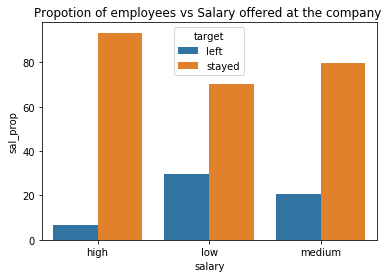

In [130]:
#plotting the barchart
sns.barplot(x='salary',y='sal_prop',hue='target',data=sal_combined)
plt.title("Propotion of employees vs Salary offered at the company ")

Insight: It is clear from the above graph that most of the employees who left were recieving a low salary followed by those recieving a medium salary

## Feature Engineering

This is the process of transforming raw variables to create new variables 

In [151]:
# the dataset
employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,target
0,1,0.38,0.53,2,157,3,0,0,sales,low,left
1,2,0.80,0.86,5,262,6,0,0,sales,medium,left
2,3,0.11,0.88,7,272,4,0,0,sales,medium,left
3,4,0.72,0.87,5,223,5,0,0,sales,low,left
4,5,0.37,0.52,2,159,3,0,0,sales,low,left


In [153]:
# Checking the datatypes
employees.dtypes

Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                      object
salary                    object
target                    object
dtype: object

In [154]:
# converting the categorical variables into dummies
catg_var = pd.get_dummies(employees[['dept','salary']])
catg_var.head()

,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [155]:
#separating the numerical variables from the dataset
num_var = employees[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']]
num_var.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [156]:
#checkuing the skewness of the numerical data
num_var.skew()


satisfaction_level      -0.476360
last_evaluation         -0.026622
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       1.853319
Work_accident            2.021149
promotion_last_5years    6.636968
dtype: float64

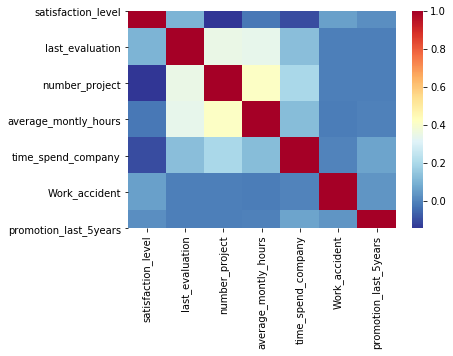

In [157]:
# Getting the correlation matrix
corr_matrix = num_var.corr(method = 'pearson')

sns.heatmap(corr_matrix, cmap='RdYlBu_r')

Insight: There is a corelation between the average monthly hours and number of projects and the score during the last evaluation.


In [158]:
# Normalizing the numerical data
from sklearn import preprocessing

# creating a scaling function
minmaxScaler = preprocessing.MinMaxScaler()

To_Scale = ['time_spend_company', 'Work_accident',
       'promotion_last_5years']

for i in range(len(To_Scale)):
      x= num_var[[To_Scale[i]]].values.astype(float)
  
      # Transforming the balance data by normalizing with minmaxScaler & adding 0.00001 to prevent getting a zero value
      num_var[To_Scale[i]] = minmaxScaler.fit_transform(x) +0.00001


num_var.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,0.12501,0.00001,0.00001
1,0.80,0.86,5,262,0.50001,0.00001,0.00001
2,0.11,0.88,7,272,0.25001,0.00001,0.00001
3,0.72,0.87,5,223,0.37501,0.00001,0.00001
4,0.37,0.52,2,159,0.12501,0.00001,0.00001


## Prediction Modelling

In [160]:
# Preparing the dataset

# Preparing the features
X = pd.concat([num_var,catg_var],axis=1)
print(X.shape)
X.head()

(14999, 20)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,0.12501,0.00001,0.00001,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,0.50001,0.00001,0.00001,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,0.25001,0.00001,0.00001,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,0.37501,0.00001,0.00001,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,0.12501,0.00001,0.00001,0,0,0,0,0,0,0,1,0,0,0,1,0


In [161]:
# Preparing the depending/target variable
Y = employees['target']
print(Y.shape)
Y.head()

(14999,)


0    left
1    left
2    left
3    left
4    left
Name: target, dtype: object

In [162]:
# Splitting the data into train and test sets || with 30% of the data set aside for testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 87)

In [163]:
# Training the model
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
# Using the model for prediction
predictions = Model.predict(X_test)

In [166]:
# Checking Accuracy
Accuracy = Model.score(X_test,y_test)

print('Accuracy of Logistic regression model prediction on test set: {}'.format(Accuracy))

Accuracy of Logistic regression model prediction on test set: 0.7977777777777778


In [167]:
# Analayzing the model performance

# Confusion Matrix for the Model
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(y_test,predictions)
print(ConfusionMatrix)

[[ 370  639]
 [ 271 3220]]


In [168]:
# Generating a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        left       0.58      0.37      0.45      1009
      stayed       0.83      0.92      0.88      3491

    accuracy                           0.80      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.78      0.80      0.78      4500



Insight: The model requires hyperparameter tuning to improve its accuracy.